In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from file_process import process_genre_pronoun
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from scipy.stats import t


c:\Users\Administrator\anaconda3\envs\lingu\lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
chinese_path = "../data/chinese"  # ← Change to your folder path
english_path = "../data/english"

chinese_df = process_genre_pronoun(chinese_path,lang="ch")
english_df = process_genre_pronoun(english_path,lang="en")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache



Processing genre: history_fiction


Loading model cost 0.473 seconds.
Prefix dict has been built successfully.


  Analysis failed: 1. 长安十二时辰 (马伯庸) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 10. 历史的裂变：中国历史上的十三场政变（畅销书《大唐兴亡三百年》作者王觉仁力作，用小说笔法，讲述中华五千年历史上的13场知名政变，聚焦那些_. (Z-Library).txt | Error: 'total_words'
  Analysis failed: 2. 风起陇西 (马伯庸 [马伯庸]) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 3. 隋乱 (酒徒) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 4. 新宋 (阿越) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 5. 步步生莲 (月关) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 6. 宰执天下 (cuslaa) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 7. 窃明 (灰熊猫) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 8. 四时歌：骑桶人自选集 (骑桶人) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 9. 辛亥：计划外革命 (雪珥) (Z-Library).txt | Error: 'total_words'
  Analysis failed: 东宫.txt | Error: 'total_words'
  Analysis failed: 后宫：甄嬛传.txt | Error: 'total_words'
  Analysis failed: 将进酒-唐酒卿.txt | Error: 'total_words'
  Analysis failed: 帝王业.txt | Error: 'total_words'
  A

In [3]:
chinese_df

,pronoun_ratio_1,pronoun_ratio_2,pronoun_ratio_3,book,genre,filepath
0,0.222157,0.168007,0.609837,1. 长安十二时辰 (马伯庸) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\1. 长安十二时辰 (马伯庸...
1,0.259043,0.097783,0.643174,10. 历史的裂变：中国历史上的十三场政变（畅销书《大唐兴亡三百年》作者王觉仁力作，用小说笔...,history_fiction,../data/chinese\history_fiction\10. 历史的裂变：中国历史...
2,0.295451,0.187891,0.516658,2. 风起陇西 (马伯庸 [马伯庸]) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\2. 风起陇西 (马伯庸 [...
3,0.362981,0.148945,0.488073,3. 隋乱 (酒徒) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\3. 隋乱 (酒徒) (Z-...
4,0.295258,0.093543,0.611199,4. 新宋 (阿越) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\4. 新宋 (阿越) (Z-...
...,...,...,...,...,...,...
83,0.531544,0.145504,0.322952,球状闪电（没有《球状闪电》，就没有后来的《三体》《三体》前传，刘慈欣三大长篇作品之一！《三体...,scifi,../data/chinese\scifi\球状闪电（没有《球状闪电》，就没有后来的《三体》...
84,0.270731,0.164674,0.564595,类人 (王晋康) (Z-Library).txt,scifi,../data/chinese\scifi\类人 (王晋康) (Z-Library).txt
85,0.422726,0.105134,0.472140,红色海洋 (韩松 [韩松]) (Z-Library).txt,scifi,../data/chinese\scifi\红色海洋 (韩松 [韩松]) (Z-Librar...
86,0.254600,0.141472,0.603928,荒潮 (陈楸帆) (Z-Library).txt,scifi,../data/chinese\scifi\荒潮 (陈楸帆) (Z-Library).txt


In [11]:
print(f'Chinese 1st Pronoun ratio:{chinese_df["pronoun_ratio_1"].mean()}')
print(f'Chinese 2nd Pronoun ratio:{chinese_df["pronoun_ratio_2"].mean()}')
print(f'Chinese 3rd Pronoun ratio:{chinese_df["pronoun_ratio_3"].mean()}')

Chinese 1st Pronoun ratio:0.3868457886016002
Chinese 2nd Pronoun ratio:0.1733676736849927
Chinese 3rd Pronoun ratio:0.4397865377134071


In [4]:
english_df

,pronoun_ratio_1,pronoun_ratio_2,pronoun_ratio_3,book,genre,filepath
0,0.095307,0.080349,0.824344,All the Light We Cannot See - Anthony Doerr.txt,history_fiction,../data/english\history_fiction\All the Light ...
1,0.085829,0.043862,0.870310,Atonement (Ian McEwan) (Z-Library).txt,history_fiction,../data/english\history_fiction\Atonement (Ian...
2,0.409956,0.107793,0.482251,Boleyn 1 The Other Boleyn Girl (Philippa Grego...,history_fiction,../data/english\history_fiction\Boleyn 1 The O...
3,0.190331,0.144381,0.665288,Bring Up the Bodies - Hilary Mantel.txt,history_fiction,../data/english\history_fiction\Bring Up the B...
4,0.164226,0.117651,0.718123,Emperor the Gates of Rome (Conn Iggulden) (Z-L...,history_fiction,../data/english\history_fiction\Emperor the Ga...
...,...,...,...,...,...,...
83,0.245176,0.154353,0.600471,"The Long Way to a Small, Angry Planet - Becky ...",scifi,"../data/english\scifi\The Long Way to a Small,..."
84,0.488338,0.080906,0.430755,The Martian - Andy Weir.txt,scifi,../data/english\scifi\The Martian - Andy Weir.txt
85,0.141211,0.136520,0.722268,The Peripheral - William Gibson.txt,scifi,../data/english\scifi\The Peripheral - William...
86,0.444270,0.043385,0.512345,Uprooted - Naomi Novik.txt,scifi,../data/english\scifi\Uprooted - Naomi Novik.txt


In [12]:
print(f'English 1st Pronoun ratio:{chinese_df["pronoun_ratio_1"].mean()}')
print(f'English 2nd Pronoun ratio:{chinese_df["pronoun_ratio_2"].mean()}')
print(f'English 3rd Pronoun ratio:{chinese_df["pronoun_ratio_3"].mean()}')

English 1st Pronoun ratio:0.3868457886016002
English 2nd Pronoun ratio:0.1733676736849927
English 3rd Pronoun ratio:0.4397865377134071


In [13]:
chinese_df['lang'] = 'chinese'
english_df['lang'] = 'english'
combined_df = pd.concat([chinese_df, english_df], ignore_index=True)

In [14]:
combined_df

,pronoun_ratio_1,pronoun_ratio_2,pronoun_ratio_3,book,genre,filepath,lang
0,0.222157,0.168007,0.609837,1. 长安十二时辰 (马伯庸) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\1. 长安十二时辰 (马伯庸...,chinese
1,0.259043,0.097783,0.643174,10. 历史的裂变：中国历史上的十三场政变（畅销书《大唐兴亡三百年》作者王觉仁力作，用小说笔...,history_fiction,../data/chinese\history_fiction\10. 历史的裂变：中国历史...,chinese
2,0.295451,0.187891,0.516658,2. 风起陇西 (马伯庸 [马伯庸]) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\2. 风起陇西 (马伯庸 [...,chinese
3,0.362981,0.148945,0.488073,3. 隋乱 (酒徒) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\3. 隋乱 (酒徒) (Z-...,chinese
4,0.295258,0.093543,0.611199,4. 新宋 (阿越) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\4. 新宋 (阿越) (Z-...,chinese
...,...,...,...,...,...,...,...
171,0.245176,0.154353,0.600471,"The Long Way to a Small, Angry Planet - Becky ...",scifi,"../data/english\scifi\The Long Way to a Small,...",english
172,0.488338,0.080906,0.430755,The Martian - Andy Weir.txt,scifi,../data/english\scifi\The Martian - Andy Weir.txt,english
173,0.141211,0.136520,0.722268,The Peripheral - William Gibson.txt,scifi,../data/english\scifi\The Peripheral - William...,english
174,0.444270,0.043385,0.512345,Uprooted - Naomi Novik.txt,scifi,../data/english\scifi\Uprooted - Naomi Novik.txt,english


In [15]:
features = ['pronoun_ratio_1', 'pronoun_ratio_2', 'pronoun_ratio_3']

In [20]:
feature_name_map = {
    'pronoun_ratio_1': '1st Person Pronoun Ratio',
    'pronoun_ratio_2': '2nd Person Pronoun Ratio',
    'pronoun_ratio_3': '3rd Person Pronoun Ratio'
}

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\3542599443.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\3542599443.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\3542599443.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


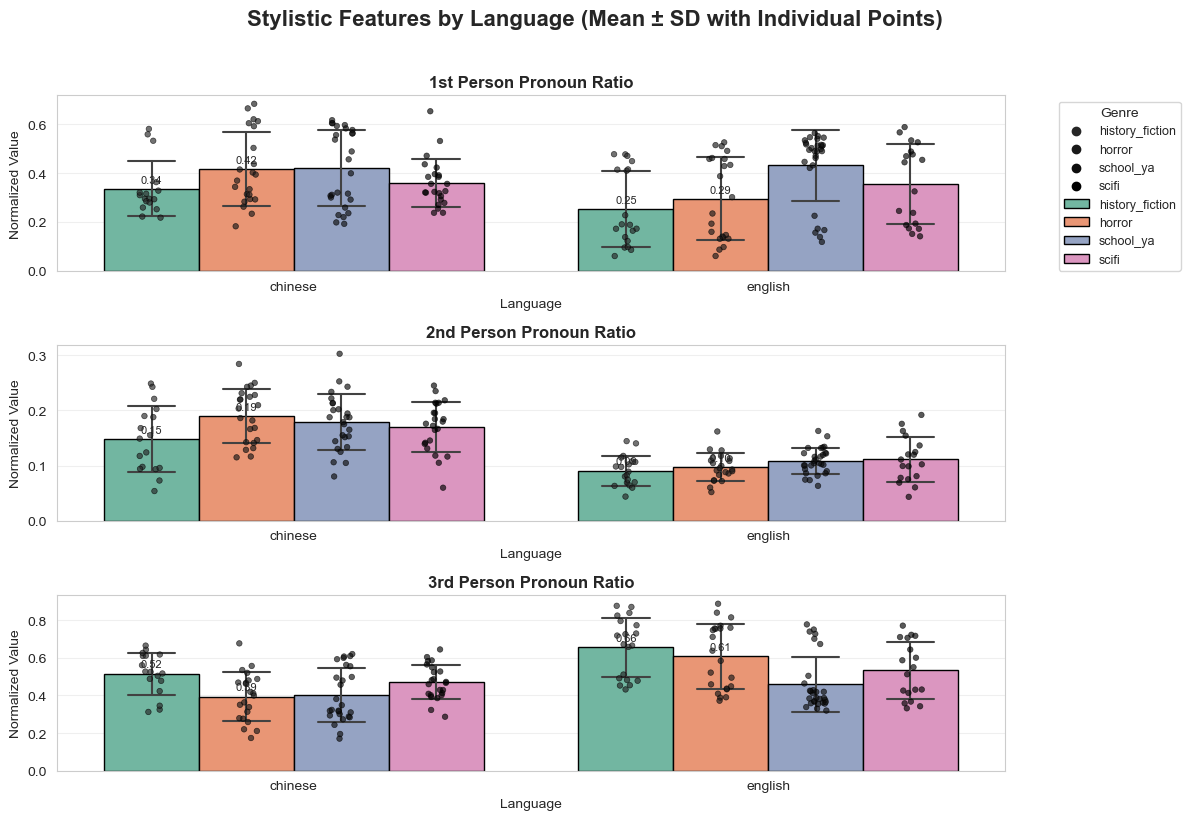

In [25]:
# Assuming combined_df, features, feature_name_map are already defined

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Example for one feature — repeat in a loop for all features if desired
for idx, feature in enumerate(features[:3]):  # Limit to first 3 as example
    display_name = feature_name_map.get(feature, feature)
    norm_feature = f"{feature}"
    
    ax = plt.subplot(3, 1, idx + 1)  # Or use a single plot if preferred
    
    # Barplot: mean with SD error bars, grouped by language, split by genre (dodged)
    sns.barplot(
        data=combined_df,
        x="lang",          # Now language on x-axis
        y=norm_feature,
        hue="genre",       # Genres mixed/dodged side-by-side
        ax=ax,
        ci="sd",
        capsize=0.1,
        errwidth=1.5,
        palette="Set2",
        edgecolor='black',
        linewidth=1
    )
    
    # Stripplot overlay: individual data points, dodged by hue
    sns.stripplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        hue="genre",
        ax=ax,
        dodge=True,
        jitter=True,
        size=4,
        alpha=0.65,
        edgecolor="black",
        linewidth=0.5,
        palette="dark:black"
    )
    
    # Value labels on bars
    for container in ax.containers[:len(ax.containers)//2]:  # Only label bars (avoid double-labeling)
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8)
    
    ax.set_title(f"{display_name}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Language", fontsize=10)
    ax.set_ylabel("Normalized Value", fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # Legend handling
    if idx == 0:
        ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    else:
        ax.legend().remove()

plt.suptitle("Stylistic Features by Language (Mean ± SD with Individual Points)", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [34]:
#access student t criteria
freedom_degree = len(combined_df) - 2
alpha = 0.05
t_criteria = t.ppf(1 - alpha, freedom_degree)
print(f'The t criteria at alpha={alpha} and freedom degree={freedom_degree} is {t_criteria}')

The t criteria at alpha=0.05 and freedom degree=174 is 1.653658016514993


In [28]:
ch_2rd_mean, ch_2rd_std = combined_df[combined_df['lang']=='chinese']['pronoun_ratio_2'].mean(), combined_df[combined_df['lang']=='chinese']['pronoun_ratio_2'].std()
en_2rd_mean, en_2rd_std = combined_df[combined_df['lang']=='english']['pronoun_ratio_2'].mean(), combined_df[combined_df['lang']=='english']['pronoun_ratio_2'].std()

In [29]:
num_chinese = len(combined_df[combined_df['lang']=='chinese'])
num_english = len(combined_df[combined_df['lang']=='english'])

In [36]:
two_rd_diff = ch_2rd_mean - en_2rd_mean
two_rd_std_power = ((num_chinese-1)*ch_2rd_std**2 + (num_english-1)*en_2rd_std**2)/(num_chinese + num_english -2)

In [37]:
t_score = two_rd_diff/np.sqrt(two_rd_std_power*(1/num_chinese + 1/num_english))
t_score

11.06508829081348

In [39]:
p = t.sf(t_score, freedom_degree)
p

3.454238154787898e-22

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\1643909368.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\1643909368.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\1643909368.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


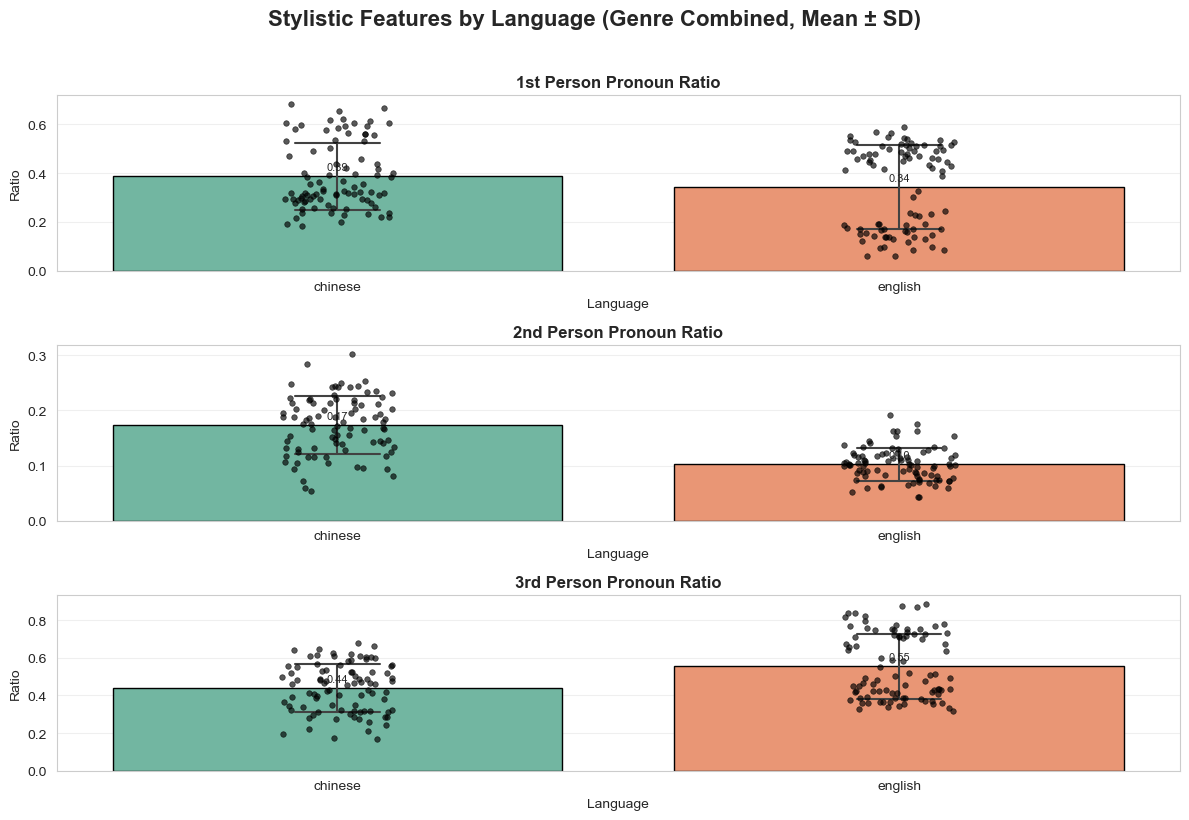

In [41]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

for idx, feature in enumerate(features[:3]):  # first 3 features as example
    display_name = feature_name_map.get(feature, feature)
    norm_feature = feature

    ax = plt.subplot(3, 1, idx + 1)

    # Barplot: mean ± SD by language (genre combined)
    sns.barplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        ax=ax,
        ci="sd",
        capsize=0.15,
        errwidth=1.5,
        palette="Set2",
        edgecolor="black",
        linewidth=1
    )

    # Stripplot: individual points (all genres mixed)
    sns.stripplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        ax=ax,
        jitter=True,
        size=4,
        alpha=0.65,
        edgecolor="black",
        linewidth=0.5,
        color="black"
    )

    # Value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3, fontsize=8)

    ax.set_title(display_name, fontsize=12, fontweight="bold")
    ax.set_xlabel("Language", fontsize=10)
    ax.set_ylabel("Ratio", fontsize=10)

    ax.grid(True, alpha=0.3, axis="y")
    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5, alpha=0.5)

plt.suptitle(
    "Stylistic Features by Language (Genre Combined, Mean ± SD)",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.show()
